# Implementación de Newton Raphson para 2 dimensiones

## 1. Implemente en Python los siguientes pasos para encontrar el mínimo o el máximo local de una función usando el método de Newton Raphson para dos dimensiones. 

In [1]:
#imports
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

### Defina y grafique la función $$ y = 3x^3 - 10x^2 - 56x + 50$$

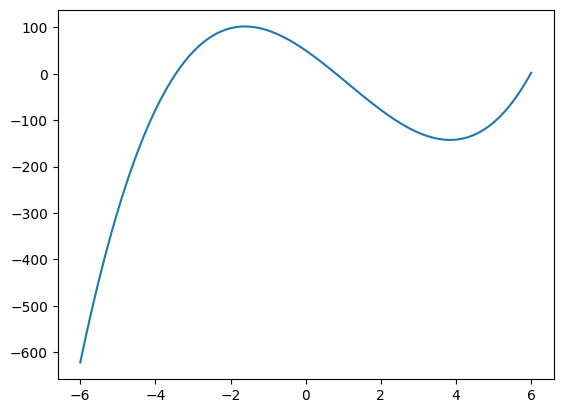

In [2]:
x = sp.symbols('x')

expr = 3*x**3 - 10*x**2 - 56*x + 50

func = sp.lambdify(x, expr, 'numpy')

range = np.linspace(-6,6,100)

values = func(range)


plt.plot(range, values)
plt.show()

In [ ]:
d1 = sp.diff(expr, x)
d2 = sp.diff(d1, x)


def NewtonRaphson(f, df, x0, tol):
    x = x0
    while abs(f(x)) > tol:
        x = x - f(x)/df(x)
    return x